In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kickstarter-projects/kickstarter_projects.csv


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
kick=pd.read_csv('/kaggle/input/kickstarter-projects/kickstarter_projects.csv')
kick

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


CHECK NULL VALUES

In [43]:
kick.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [44]:
kick['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

 Statistics

In [45]:
kick.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [46]:
kick[['Category','Subcategory','Country','State']].describe()

,Category,Subcategory,Country,State
count,374853,374853,374853,374853
unique,15,159,22,5
top,Film & Video,Product Design,United States,Failed
freq,62694,22310,292618,197611


In [47]:
kick[['Launched','Deadline']].describe()

,Launched,Deadline
count,374853,374853
unique,374297,3164
top,2014-06-06 16:16:32,2014-08-08
freq,2,702


In [48]:
kick[['Goal','Pledged','Backers']].describe()

,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


<AxesSubplot:xlabel='State', ylabel='count'>

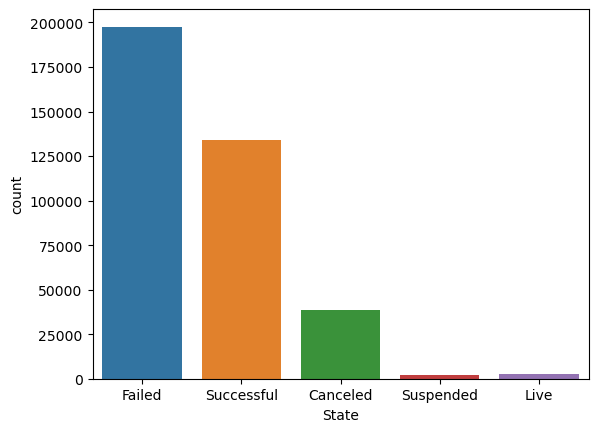

In [49]:
sns.countplot(kick,x='State')

Text(0.5, 1.0, 'Category vs State')

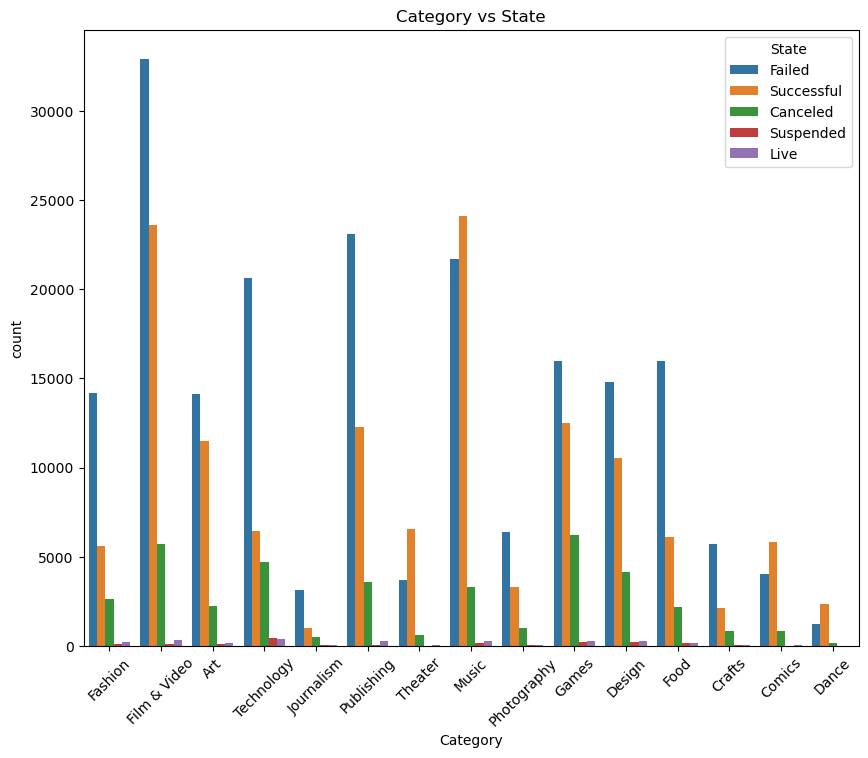

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(kick,x='Category',hue='State')
plt.xticks(rotation=45)
plt.title('Category vs State')

Text(0.5, 1.0, 'CATEGORY')

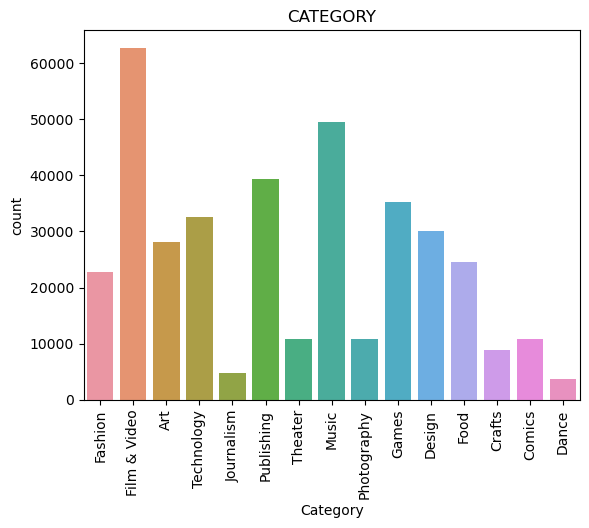

In [51]:
sns.countplot(kick,x='Category')
plt.xticks(rotation=90)
plt.title('CATEGORY')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Art'),
  Text(1, 0, 'Comics'),
  Text(2, 0, 'Crafts'),
  Text(3, 0, 'Dance'),
  Text(4, 0, 'Design'),
  Text(5, 0, 'Fashion'),
  Text(6, 0, 'Film & Video'),
  Text(7, 0, 'Food'),
  Text(8, 0, 'Games'),
  Text(9, 0, 'Journalism'),
  Text(10, 0, 'Music'),
  Text(11, 0, 'Photography'),
  Text(12, 0, 'Publishing'),
  Text(13, 0, 'Technology'),
  Text(14, 0, 'Theater')])

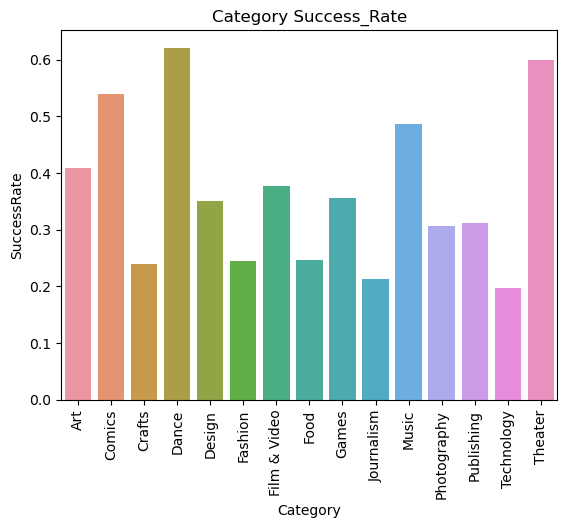

In [52]:
category_success=kick[['State','Category']]\
.groupby('Category') \
.agg(lambda x:x[x=='Successful'].count()/x.count())\
.reset_index()\
.rename(columns={'State':'SuccessRate'})
sns.barplot(category_success,x='Category',y='SuccessRate')
plt.title('Category Success_Rate')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Goal as by state')

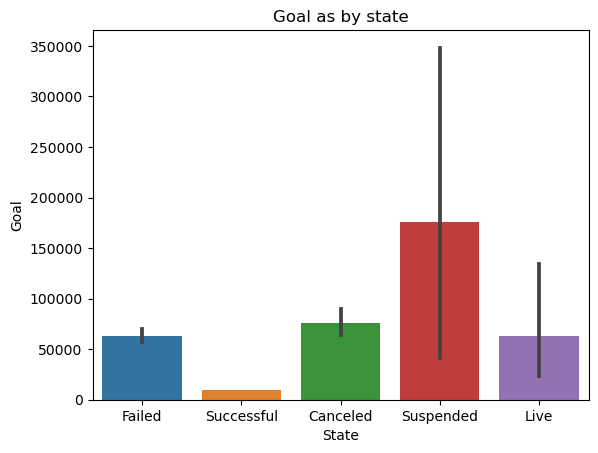

In [53]:
sns.barplot(kick,x='State',y='Goal')
plt.title('Goal as by state')


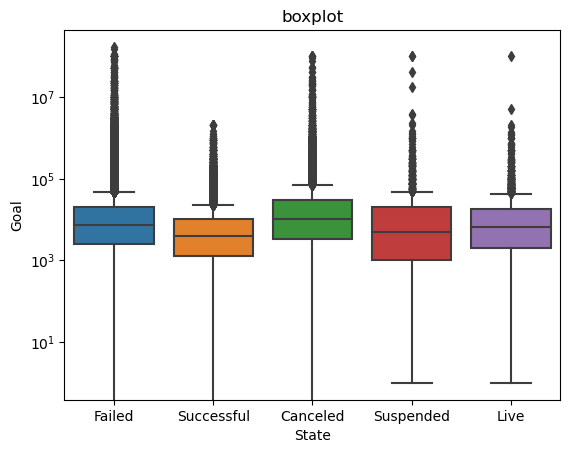

In [54]:
sns.boxplot(kick,x='State',y='Goal')
plt.title('boxplot')
plt.yscale('log')

In [55]:
clear=kick.drop(kick[kick['Backers']==0].index)
clear['Pledgebacker']=clear['Pledged']/ clear['Backers']

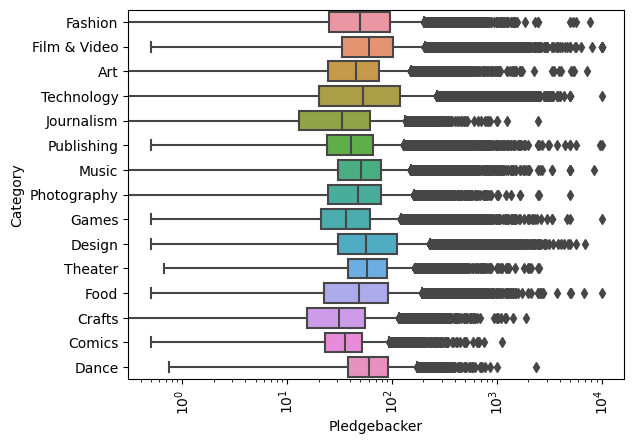

In [56]:
sns.boxplot(clear,x='Pledgebacker',y='Category')
plt.xticks(rotation=90)
plt.xscale('log')

Text(0.5, 1.0, 'Category by plegdebacker')

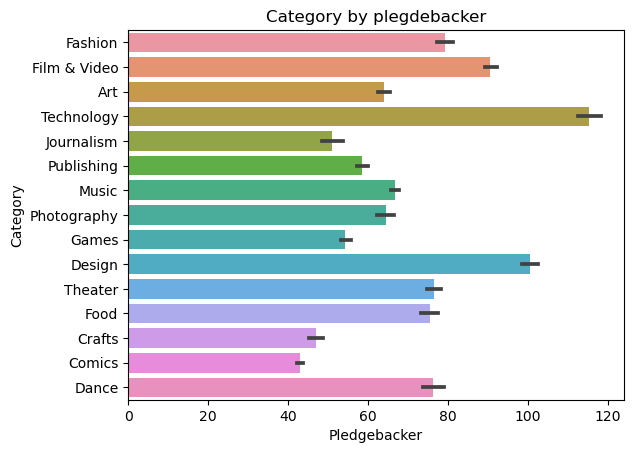

In [57]:
sns.barplot(clear,x='Pledgebacker',y='Category')
plt.title('Category by plegdebacker')

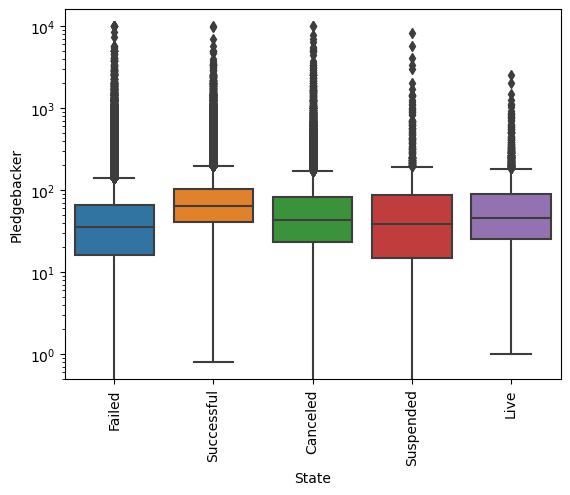

In [58]:
sns.boxplot(clear,y='Pledgebacker',x='State')
plt.xticks(rotation=90)
plt.yscale('log')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Failed'),
  Text(1, 0, 'Successful'),
  Text(2, 0, 'Canceled'),
  Text(3, 0, 'Suspended'),
  Text(4, 0, 'Live')])

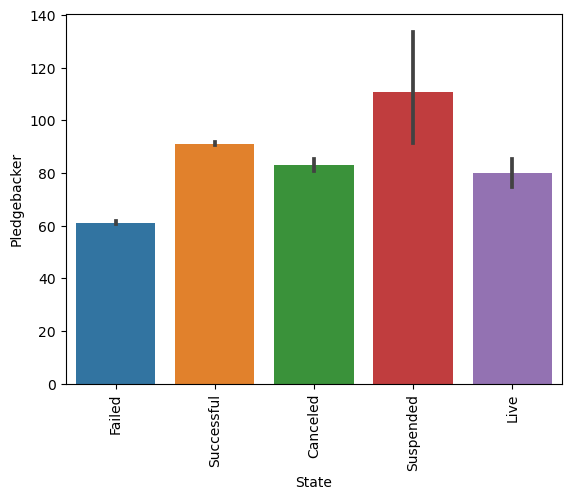

In [59]:
sns.barplot(clear,y='Pledgebacker',x='State')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Stae vs Backers')

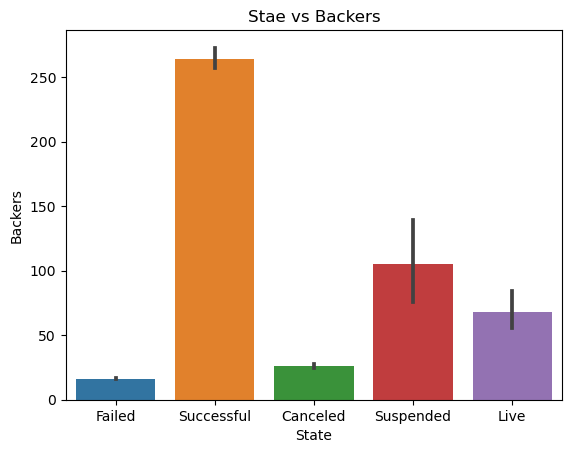

In [60]:
sns.barplot(kick,x='State',y='Backers')
plt.title('Stae vs Backers')

Text(0.5, 1.0, 'Category vs Goal')

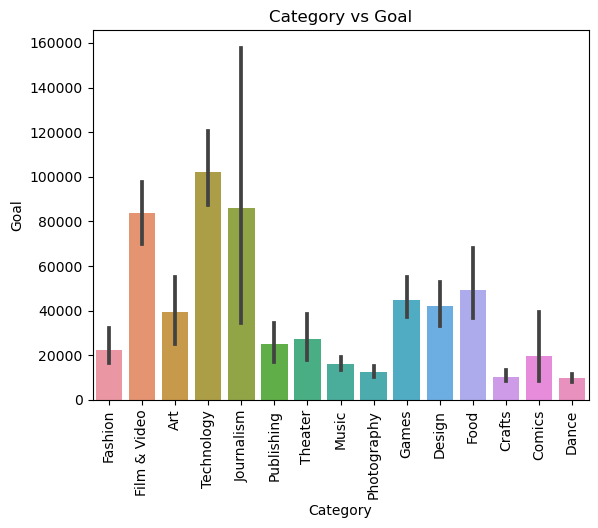

In [61]:
sns.barplot(kick,x='Category',y='Goal')
plt.xticks(rotation=90)
plt.title('Category vs Goal')

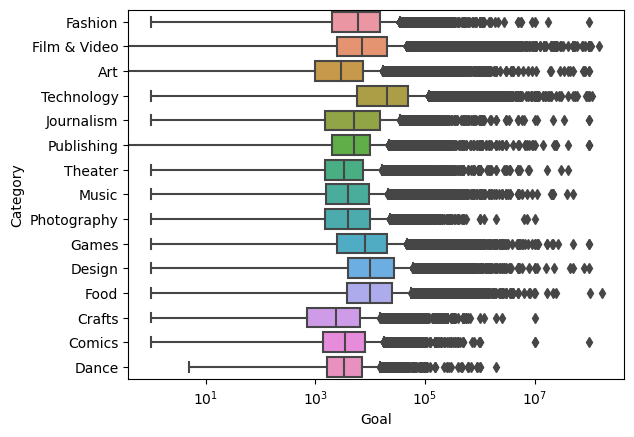

In [62]:
sns.boxplot(kick,x='Goal',y='Category')
plt.xscale('log')